<div>
    <h1><center>CS105 Mini-Project</center></h1>
    <h2><center>Does who a student is living with effect if and how they work jobs?</center></h2>
    <p>By: <b>NAMES HERE</b></p>
</div>

# Data Loading & Preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Load dataframe from data.csv
df = pd.read_csv("data.csv")

# Select relevant columns
df = df.iloc[:, [2, 3, 7, 8, 9, 34, 58, 59, 60, 61, 26]]
df

,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
0,Senior,23+,Neither,House,6,2.73,Yes,5 - 10,Off-campus,No,No
1,Junior,20,Both,Apartment,4,3.7,No,NaN,NaN,NaN,Yes
2,Junior,23+,Friends,House,4,3.75,No,NaN,NaN,NaN,No
3,Senior,23+,Neither,Apartment,1,3.81,No,NaN,NaN,No,No
4,Graduate,22,Neither,Apartment,1,3.23,Yes,10 - 20,Off-campus,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
255,Junior,21,Friends,House,5,4,Yes,10 - 20,On-campus,No,No
256,NaN,21,Family,Apartment,North District 4 bed 2 bath,3.5,No,NaN,NaN,NaN,No
257,Senior,21,Family,House,9,3.7,No,1 - 5,Off-campus,No,No
258,Sophomore,21,Family,Apartment,4,3,Yes,5 - 10,On-campus,No,No


## Preprocessing

In [2]:
# Fixes empty values
df['Do you currently work?'] = df['Do you currently work?'].fillna('No')

# Replaces custom text answers with appropriate values
df['How many people live in your household?'] = (df['How many people live in your household?']
                                                 .fillna(0)
                                                 .replace('4 in total', '4')
                                                 .replace('4 (Including me)', '4')
                                                 .replace('at school 4 including me ', '4')
                                                 .replace('3 excluding me', '4')
                                                 .replace('5 including me', '5')
                                                 .replace('North District 4 bed 2 bath', '4')
                                                 .replace('3 (room), 8 (hall), ~70 (building)', '3')
                                                 .astype(int))
df['Who do you live with?'] = df['Who do you live with?'].replace('Family, Friends', 'Both').replace(
    'Family, Friends, Both', 'Both')
df['Do you currently live in a house, apartment, or dorm?'] = (
    df['Do you currently live in a house, apartment, or dorm?']
    .replace('house (renting)', 'House'))

df.loc[df['What was your GPA your very first quarter at UCR?'].str.contains(
    "I am not sure|idk|I don't know|This is my first quarter|i don't rem|not sure|I never checked. |I dont know") == True, 'What was your GPA your very first quarter at UCR?'] = np.nan
df['What was your GPA your very first quarter at UCR?'] = (
    df['What was your GPA your very first quarter at UCR?']
    .replace('Idk, I think 3.2 or something along those lines', '3.2')
    .replace('2.8?', '2.8')
    .replace('3 point something', '3.0')
    .replace('3.67 I think', '3.67')
    .replace('3.0?', '3.0')
    .replace('about 3.0', '3.0')
    .astype(np.float64))
# Normalizes non-applicable answers
df.loc[df['Do you currently work?'] == 'No', 'How many hours do you work per week on average?'] = 0
df.loc[df['Do you currently work?'] == 'No', 'Do you work in a department related to your major?'] = np.nan

df

,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
0,Senior,23+,Neither,House,6,2.73,Yes,5 - 10,Off-campus,No,No
1,Junior,20,Both,Apartment,4,3.70,No,0,NaN,NaN,Yes
2,Junior,23+,Friends,House,4,3.75,No,0,NaN,NaN,No
3,Senior,23+,Neither,Apartment,1,3.81,No,0,NaN,NaN,No
4,Graduate,22,Neither,Apartment,1,3.23,Yes,10 - 20,Off-campus,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
255,Junior,21,Friends,House,5,4.00,Yes,10 - 20,On-campus,No,No
256,NaN,21,Family,Apartment,4,3.50,No,0,NaN,NaN,No
257,Senior,21,Family,House,9,3.70,No,0,Off-campus,NaN,No
258,Sophomore,21,Family,Apartment,4,3.00,Yes,5 - 10,On-campus,No,No


In [3]:
# Working DataFrame
w_df = df[df['Do you currently work?'] == 'Yes']
# Not working DataFrame
nw_df = df[df['Do you currently work?'] == 'No']
w_df

,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
0,Senior,23+,Neither,House,6,2.73,Yes,5 - 10,Off-campus,No,No
4,Graduate,22,Neither,Apartment,1,3.23,Yes,10 - 20,Off-campus,Yes,No
8,Junior,20,Friends,House,6,3.40,Yes,10 - 20,On-campus,No,No
9,Senior,22,Family,House,5,NaN,Yes,1 - 5,On-campus,No,No
13,Junior,21,Family,Apartment,4,3.50,Yes,10 - 20,Off-campus,No,No
...,...,...,...,...,...,...,...,...,...,...,...
246,Graduate,23+,Family,House,2,4.00,Yes,10 - 20,On-campus,Yes,No
247,Senior,21,Friends,Apartment,3,3.60,Yes,20 - 40,Off-campus,No,Yes
252,Junior,20,Family,House,5,3.50,Yes,20 - 40,Off-campus,No,No
255,Junior,21,Friends,House,5,4.00,Yes,10 - 20,On-campus,No,No


In [4]:
nw_df

,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
1,Junior,20,Both,Apartment,4,3.70,No,0,NaN,NaN,Yes
2,Junior,23+,Friends,House,4,3.75,No,0,NaN,NaN,No
3,Senior,23+,Neither,Apartment,1,3.81,No,0,NaN,NaN,No
5,Junior,21,Both,Apartment,4,4.00,No,0,NaN,NaN,No
6,Sophomore,19,Friends,Apartment,4,4.00,No,0,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
253,Senior,21,Family,House,6,4.00,No,0,NaN,NaN,No
254,Junior,19,Family,House,5,3.80,No,0,NaN,NaN,Yes
256,NaN,21,Family,Apartment,4,3.50,No,0,NaN,NaN,No
257,Senior,21,Family,House,9,3.70,No,0,Off-campus,NaN,No


# Analysis

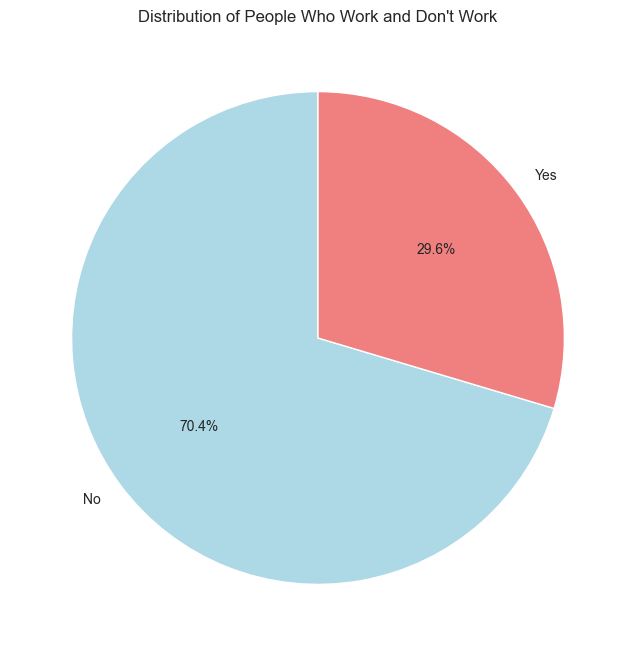

In [5]:
# Count the number of people who work and don't work
work_counts = df['Do you currently work?'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of People Who Work and Don\'t Work')
plt.show()

The majority of student respondents (70.4%) do **not** work while attending school.

"Do you currently live in a house, apartment, or dorm?",Apartment,Dorm,House,Room
Do you currently work?,,,,
No,0.500000,0.131868,0.362637,0.005495
Yes,0.493506,0.064935,0.441558,0.000000


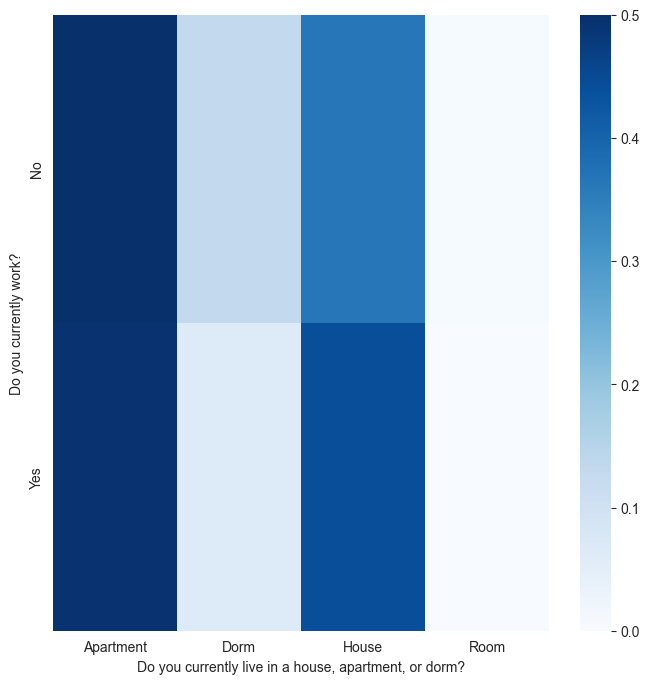

In [6]:
df_2dhist = pd.crosstab(df.loc[:, 'Do you currently work?'],
                        df.loc[:, 'Do you currently live in a house, apartment, or dorm?'],
                        normalize='index')

# Plot heatmap
plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap="Blues")
plt.xlabel('Do you currently live in a house, apartment, or dorm?')
_ = plt.ylabel('Do you currently work?')
df_2dhist

For both working & non-working participants, the proportion who live in an apartment are equivalent (50%).

However, 13% of non-working participants live in a dorm while only 6% of working participants live in a dorm.
This 7% drop is matched in participants who live a house, with 44% of working participants living in a house compared to 36% of non-working participants.

This indicates that working participants tend to live off-campus and in living situations that have a higher cost of living.

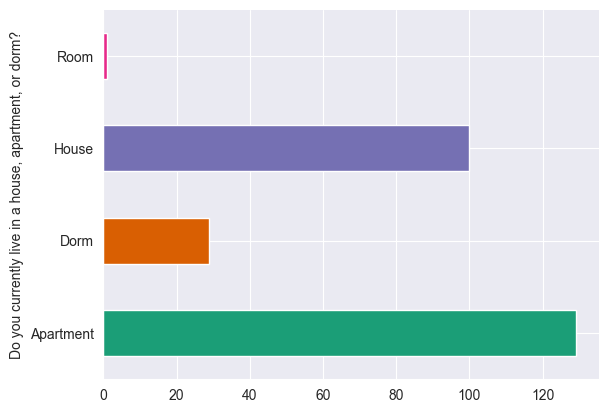

In [7]:
df.groupby('Do you currently live in a house, apartment, or dorm?').size().plot(kind='barh',
                                                                                color=sns.palettes.mpl_palette(
                                                                                    'Dark2'))
plt.gca().spines[['top', 'right', ]].set_visible(False)

Most participants live in either an Apartment or a House. This would indicate that most students either live off-campus or on-campus apartments.

Total Average GPA:  3.6520247933884296


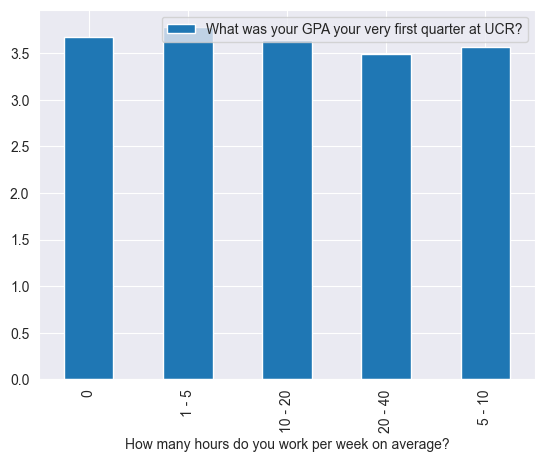

In [8]:
dataTable1 = pd.pivot_table(data=df, values='What was your GPA your very first quarter at UCR?',
                            index='How many hours do you work per week on average?', aggfunc='mean')
_ = dataTable1.plot(kind='bar')
print("Total Average GPA: ", df['What was your GPA your very first quarter at UCR?'].mean())

The average GPA seems to be independent in respect to working hours per week.
Most students who work less than 20 hours have an equivalent average GPA to the total average GPA of all participants (3.65).

There is a small drop in GPA associated with students who work more than 20 hours (3.5 GPA), which may mean some of those students may struggle maintaining balance between work and school.  

This would indicate that most students seem to be able to balance work with school. However, it would also indicate that
students who work full-time jobs may struggle slightly in school.

## Hypotheses

### Hypothesis 2: Students who live on-campus are more likely to have roommates of the same major.

Null Hypothesis: There is no relationship between students who live on-campus and students who have roommates of the same major.

Significance value: 0.1
Degrees of Freedom: 2

In [9]:
roommates_major_table = pd.crosstab(df.iloc[:, 3], df.iloc[:, 9], margins=True, margins_name='Total')
roommates_major_table

Do you work in a department related to your major?,No,Yes,Total
"Do you currently live in a house, apartment, or dorm?",,,
Apartment,22,16,38
Dorm,4,1,5
House,27,7,34
Total,53,24,77


In [10]:
num_rows, num_cols = roommates_major_table.shape
# Initialize expected frequencies
expected_frequencies = []
chi_squared = 0
for i in range(num_rows - 1):
    row_totals = roommates_major_table.iloc[i, -1]
    for j in range(num_cols - 1):
        col_totals = roommates_major_table.iloc[-1, j]
        expected_frequency = (row_totals * col_totals) / roommates_major_table.iloc[-1, -1]
        expected_frequencies.append(expected_frequency)
        chi_squared += ((roommates_major_table.iloc[i, j] - expected_frequency) ** 2) / expected_frequency

print("Chi-squared value:", chi_squared)

Chi-squared value: 4.183390044200403


With a significance value of 0.1 and 2 degrees of freedom, chi-squared must be greater than 4.61.
Since chi-squared of `4.18 < 4.61`, we accept the null hypothesis:

There is no relationship between students who live on-campus and students who have roommates of the same major.